In [1]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train_path="data/classification/train"
test_path="data/classification/test"
val_path="data/classification/valid"

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [4]:
train_generator = train_datagen.flow_from_directory(train_path, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(val_path, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
test_generator = test_datagen.flow_from_directory(test_path, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 160 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
for layer in base_model.layers:
    layer.trainable=False

In [7]:
from tensorflow.keras.optimizers import RMSprop
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
mc = ModelCheckpoint('model/Incv3_model.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 25, callbacks=[mc])

Epoch 1/25
  1/100 [..............................] - ETA: 2:59 - loss: 1.8626 - acc: 0.5500
Epoch 00001: val_loss improved from inf to 1.86258, saving model to model/Incv3_model.hdf5
100/100 [==============================] - 149s 1s/step - loss: 0.7716 - acc: 0.7010 - val_loss: 1.8626 - val_acc: 0.5500
Epoch 2/25
  1/100 [..............................] - ETA: 1:26 - loss: 1.4020 - acc: 0.5500
Epoch 00002: val_loss improved from 1.86258 to 1.40195, saving model to model/Incv3_model.hdf5
100/100 [==============================] - 103s 1s/step - loss: 0.4971 - acc: 0.7890 - val_loss: 1.4020 - val_acc: 0.5500
Epoch 3/25
  1/100 [..............................] - ETA: 1:19 - loss: 0.9859 - acc: 0.6500
Epoch 00003: val_loss improved from 1.40195 to 0.98587, saving model to model/Incv3_model.hdf5
100/100 [==============================] - 103s 1s/step - loss: 0.4778 - acc: 0.8180 - val_loss: 0.9859 - val_acc: 0.6500
Epoch 4/25
  1/100 [..............................] - ETA: 1:18 - loss: 1.

  1/100 [..............................] - ETA: 1:23 - loss: 1.4323 - acc: 0.7000
Epoch 00023: val_loss did not improve from 0.86111
100/100 [==============================] - 110s 1s/step - loss: 0.2721 - acc: 0.9025 - val_loss: 1.4323 - val_acc: 0.7000
Epoch 24/25
  1/100 [..............................] - ETA: 1:18 - loss: 1.4482 - acc: 0.7500
Epoch 00024: val_loss did not improve from 0.86111
100/100 [==============================] - 101s 1s/step - loss: 0.2382 - acc: 0.9080 - val_loss: 1.4482 - val_acc: 0.7500
Epoch 25/25
  1/100 [..............................] - ETA: 1:16 - loss: 2.3431 - acc: 0.6000
Epoch 00025: val_loss did not improve from 0.86111
100/100 [==============================] - 110s 1s/step - loss: 0.2382 - acc: 0.9140 - val_loss: 2.3431 - val_acc: 0.6000


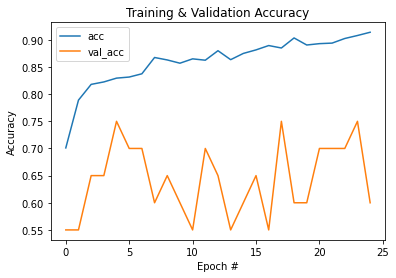

In [13]:
import matplotlib.pyplot as plt
# plot training history
plt.figure()
plt.plot(inc_history.history['acc'], label='acc')
plt.plot(inc_history.history['val_acc'], label='val_acc')

plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("plot/Inc3_A.png")
plt.show()

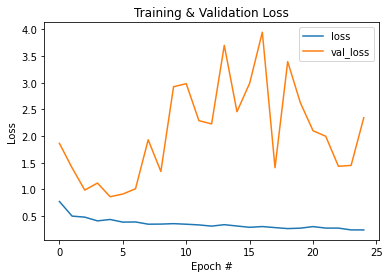

In [14]:
import matplotlib.pyplot as plt
# plot training history
plt.figure()
plt.plot(inc_history.history['loss'], label='loss')
plt.plot(inc_history.history['val_loss'], label='val_loss')

plt.title("Training & Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("plot/Inc3_L.png")
plt.show()

In [12]:
from tensorflow.keras.models import load_model
model1 = load_model('model/Incv3_model.hdf5')
model1.evaluate_generator(test_generator)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[0.28805023431777954, 0.9]